## Recommendations for Decision Makers

- Use a flexible pricing model that changes prices automatically based on the number of reviews and how often we get them. This will help us get more bookings as the property gets better feedback, which will bring in even more reviews and bookings.

- Ask guests to leave reviews by offering small rewards, like discounts or special offers for their next stay. More reviews will make our properties more visible and attract more bookings.

- In popular areas like Queenscliffe and Surf Coast, raise prices because people are willing to pay more in these high-demand locations.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Load data

In [2]:
df = pd.read_csv('listings.csv')

In [3]:
# Print first 6 rows
df.iloc[:6,]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,21302,the OCEAN HAVEN - pet-friendly,81292,Laurel & Sue,NaN,Surf Coast,-38.46329,144.09163,Entire home/apt,800.0,2,51,2023-01-18,0.43,3,365,0,NaN
1,27561,Executive residence peaceful locale,119103,Lynn,NaN,Surf Coast,-38.34221,144.30398,Entire home/apt,500.0,5,2,2022-04-18,0.03,2,87,0,NaN
2,70449,Otway foothills retreat,357052,Craig And Tim,NaN,Colac Otway,-38.32982,143.82842,Entire home/apt,277.0,1,59,2024-06-09,0.51,1,320,7,NaN
3,84516,Sea-Lit - luxury plus stunning ocean views,462049,David,NaN,Moyne,-38.39149,142.22084,Entire home/apt,470.0,2,152,2024-06-09,1.22,1,256,18,NaN
4,195168,Historic House with Sea Views,899909,Tony,NaN,Surf Coast,-38.54025,143.97139,Entire home/apt,600.0,2,32,2024-05-19,0.21,1,345,4,NaN
5,291691,BH Sleepout,1511087,Kim,NaN,Greater Geelong,-38.27942,144.49073,Entire home/apt,79.0,2,88,2024-04-21,0.59,2,279,17,NaN


In [4]:
# Display DataFrame info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7353 entries, 0 to 7352
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7353 non-null   int64  
 1   name                            7353 non-null   object 
 2   host_id                         7353 non-null   int64  
 3   host_name                       7353 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   7353 non-null   object 
 6   latitude                        7353 non-null   float64
 7   longitude                       7353 non-null   float64
 8   room_type                       7353 non-null   object 
 9   price                           6295 non-null   float64
 10  minimum_nights                  7353 non-null   int64  
 11  number_of_reviews               7353 non-null   int64  
 12  last_review                     65

In [5]:
# Get DataFrame dimensions
df.shape

(7353, 18)

### Columns with null values 

In [6]:
# Find columns with null values
null_col = [col for col in df.columns if df[col].isna().any()]
print("Columns with null values:", null_col)

Columns with null values: ['neighbourhood_group', 'price', 'last_review', 'reviews_per_month', 'license']


### Data type of Columns with null values 

In [7]:
df[null_col].dtypes

neighbourhood_group    float64
price                  float64
last_review             object
reviews_per_month      float64
license                float64
dtype: object

In [8]:
# Count null values in float columns
for col in null_col:
    if df[col].dtype == 'float64':
        column_sum = df[col].isna().sum()
        print(f"Number of null values in {col}: {column_sum}")

Number of null values in neighbourhood_group: 7353
Number of null values in price: 1058
Number of null values in reviews_per_month: 803
Number of null values in license: 7353


In [9]:
# Drop Columns with nan values 
df.drop(['neighbourhood_group','license'] , axis=1 ,inplace = True)

In [10]:
# summary stats
df['price'].describe()

count    6295.000000
mean      353.128832
std       256.249207
min        16.000000
25%       196.000000
50%       289.000000
75%       433.000000
max      3800.000000
Name: price, dtype: float64

In [11]:
# filling any Nan with the mean price 
df['price'] = df['price'].fillna(df['price'].mean())

In [12]:
# Count of values 
df['reviews_per_month'].value_counts()

reviews_per_month
0.07     114
0.33      98
0.05      95
0.11      88
0.16      78
        ... 
7.91       1
9.91       1
4.68       1
6.93       1
11.00      1
Name: count, Length: 668, dtype: int64

In [13]:
#  Remove rows with missing values in reviews_per_month
df = df.dropna(subset=['reviews_per_month'])

In [14]:
# Check for any remaining NaN values
nan_counts = df.isna().sum()
print("Columns with NaN values:")
print(nan_counts[nan_counts > 0])

Columns with NaN values:
Series([], dtype: int64)


In [15]:
# Check for duplicates
duplicate_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")


Number of duplicate rows: 0


In [16]:
df.sample(4)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1789,27496281,5. ) Seal Apartments - Two Bedroom Sea view,207249864,Michael,Colac Otway,-38.776700,143.661610,Entire home/apt,296.000000,1,52,2024-06-02,0.74,5,197,12
777,15537703,BIG4 Port Fairy -Kingfisher Cabin,17054915,Jenni,Moyne,-38.375270,142.231000,Entire home/apt,353.128832,1,22,2020-06-08,0.24,3,0,0
5628,867700408810383292,Forrest Luxury Escape,22347233,Sandra,Colac Otway,-38.520050,143.714018,Entire home/apt,400.000000,2,16,2024-06-10,1.20,3,164,15
6699,1055209781234919740,Central & Cosy Family Retreat!,64110237,Dale,Greater Geelong,-38.157911,144.337695,Entire home/apt,354.000000,2,10,2024-06-24,1.78,1,165,10


In [17]:
# List of columns to drop
columns_to_drop = [ 'name', 'host_id', 'host_name',
                 'number_of_reviews_ltm'] 
# Drop the columns
df = df.drop(columns=columns_to_drop)

In [18]:
df.columns

Index(['id', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [19]:
df.dtypes

id                                  int64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [20]:
# Sort the dataframe by number_of_reviews column in descending
sort_df_des_number_of_rev = df.sort_values(by='number_of_reviews',ascending=False)
sort_df_des_number_of_rev.head(9)

,id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
831,16116684,Corangamite,-38.609890,143.00276,Entire home/apt,119.000000,1,1218,2024-06-26,13.21,2,132
781,15626202,Colac Otway,-38.722072,143.71920,Entire home/apt,148.000000,1,1206,2024-06-24,12.90,1,301
203,4888198,Warrnambool,-38.396920,142.47440,Private room,111.000000,1,1157,2024-05-29,10.05,1,285
741,14954062,Warrnambool,-38.376310,142.48839,Entire home/apt,166.000000,1,986,2024-06-26,10.40,1,303
970,17947222,Warrnambool,-38.365210,142.48453,Private room,105.000000,1,930,2024-06-26,10.56,1,81
728,14714717,Colac Otway,-38.751940,143.66837,Entire home/apt,167.000000,1,912,2024-06-14,9.58,1,306
386,8689852,Colac Otway,-38.733940,143.68650,Private room,120.000000,1,911,2024-06-09,8.58,1,45
315,7076872,Colac Otway,-38.758180,143.66109,Entire home/apt,353.128832,1,903,2023-04-29,8.29,2,0
54,1848144,Colac Otway,-38.761790,143.66715,Entire home/apt,139.000000,2,897,2024-06-10,6.97,1,29


In [21]:
df.describe()

,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,6.550000e+03,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000
mean,3.476134e+17,-38.362113,143.840365,341.528843,2.457863,56.574351,1.352966,46.909008,194.324733
std,4.358448e+17,0.207981,0.834006,218.268485,14.306805,98.748722,1.620669,122.159756,124.201116
min,2.130200e+04,-38.837150,140.997101,16.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,2.439932e+07,-38.463368,143.661676,202.000000,1.000000,6.000000,0.310000,1.000000,85.000000
50%,4.908967e+07,-38.333093,144.187327,313.000000,2.000000,20.000000,0.820000,2.000000,193.000000
75%,7.864311e+17,-38.259970,144.372830,393.000000,2.000000,65.000000,1.770000,24.000000,317.750000
max,1.172103e+18,-37.210990,144.718640,2579.000000,1000.000000,1218.000000,18.860000,541.000000,365.000000


In [22]:
# Cap outliers and compare original vs capped data
def cap_outliers(df, columns, lower_percentile=0.01, upper_percentile=0.99):
    df_capped = df.copy()
    for column in columns:
        lower_limit = df[column].quantile(lower_percentile)
        upper_limit = df[column].quantile(upper_percentile)
        df_capped[column] = df_capped[column].clip(lower_limit, upper_limit)
    return df_capped

# Columns to treat for outliers
columns_to_treat = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count']

# Apply capping
df_capped = cap_outliers(df, columns_to_treat)

# Compare original and capped data
for column in columns_to_treat:
    print(f"\n{column}:")
    print("Original:", df[column].describe())
    print("Capped:", df_capped[column].describe())
    print("*"*40)


price:
Original: count    6550.000000
mean      341.528843
std       218.268485
min        16.000000
25%       202.000000
50%       313.000000
75%       393.000000
max      2579.000000
Name: price, dtype: float64
Capped: count    6550.000000
mean      337.653057
std       194.788395
min        70.000000
25%       202.000000
50%       313.000000
75%       393.000000
max      1160.100000
Name: price, dtype: float64
****************************************

minimum_nights:
Original: count    6550.000000
mean        2.457863
std        14.306805
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max      1000.000000
Name: minimum_nights, dtype: float64
Capped: count    6550.000000
mean        2.064733
std         1.157643
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         7.000000
Name: minimum_nights, dtype: float64
****************************************

number_of_reviews:
Original: count    6550.000000
mean

In [23]:
# Drop columns with outliers from the original DataFrame
columns_to_drop = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count']
df_modified = df.drop(columns=columns_to_drop)

# Concatenate the modified original DataFrame with the capped DataFrame
concatenated_df = pd.concat([df_modified, df_capped], axis=1)

# Remove duplicate columns
df_capped = concatenated_df.loc[:, ~concatenated_df.columns.duplicated()]

# Display the final columns
print(df_capped.columns)

Index(['id', 'neighbourhood', 'latitude', 'longitude', 'room_type',
       'last_review', 'availability_365', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count'],
      dtype='object')


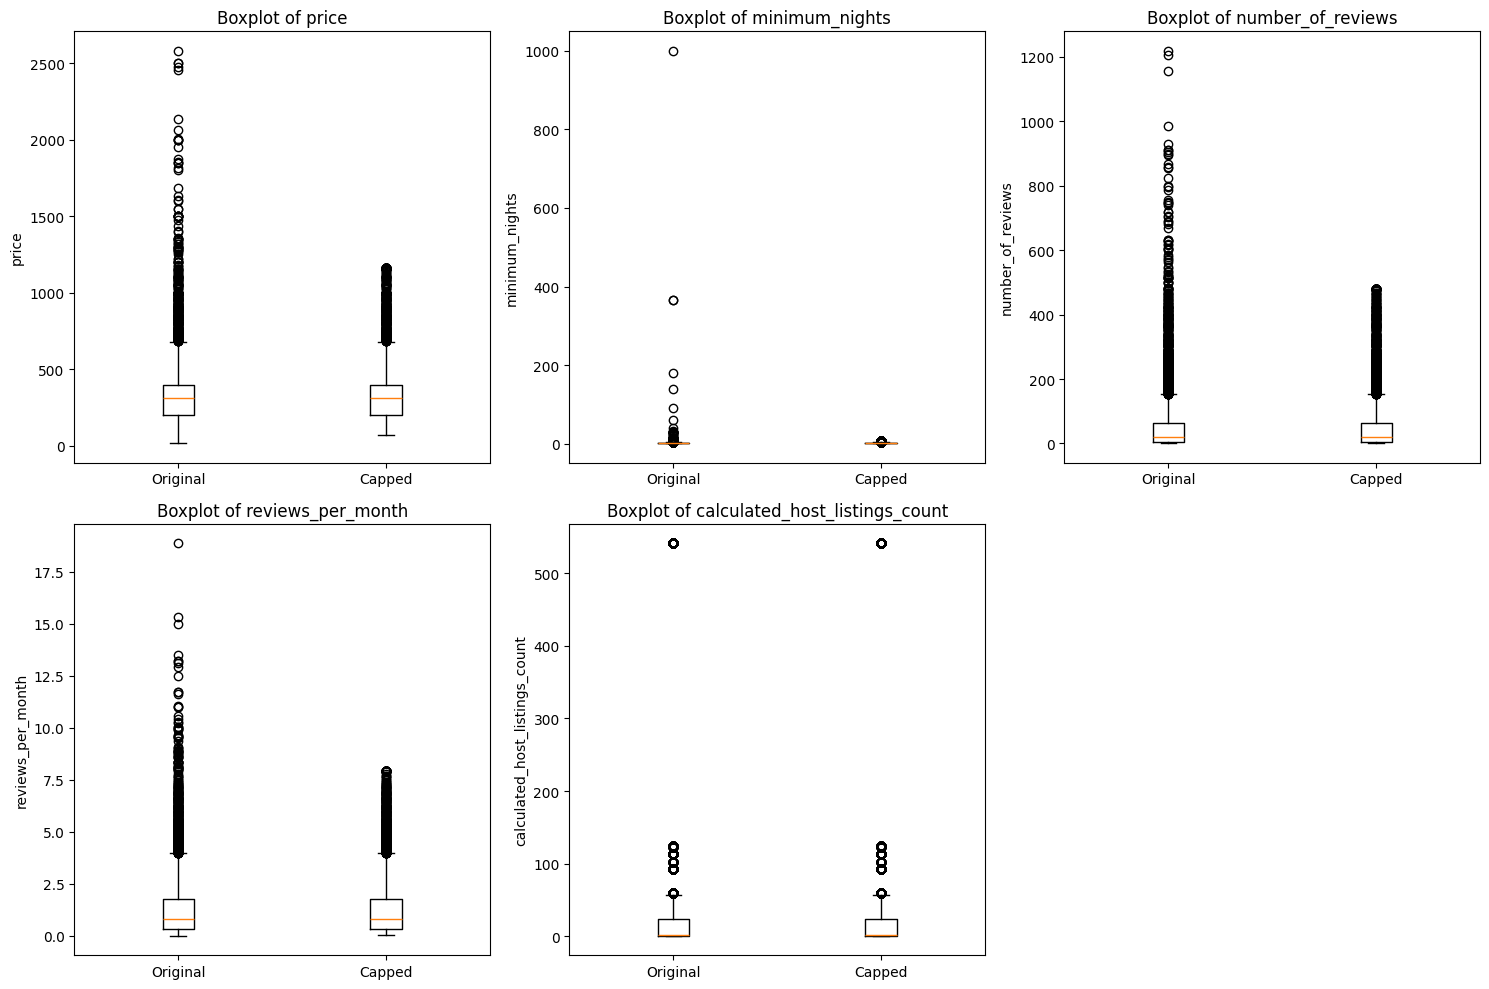

In [24]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_treat, 1):
    plt.subplot(2, 3, i)
    plt.boxplot([df[column], df_capped[column]], labels=['Original', 'Capped'])
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)
plt.tight_layout()
plt.show()

## Summary Points

- Capping reduced the range and outliers for `price`, `minimum_nights`, and `reviews_per_month`.
- `number_of_reviews` shows a similar pattern in both original and capped data, with fewer extreme outliers in the capped data.
- `calculated_host_listings_count` remained largely unaffected by the capping, with extreme outliers present in both datasets.

In [25]:
for column in columns_to_treat:
    lower_limit = df[column].quantile(0.01)
    upper_limit = df[column].quantile(0.99)
    print(f"{column}:")
    print(f"Lower limit: {lower_limit:.2f}")
    print(f"Upper limit: {upper_limit:.2f}")
    print("-"*40)

price:
Lower limit: 70.00
Upper limit: 1160.10
----------------------------------------
minimum_nights:
Lower limit: 1.00
Upper limit: 7.00
----------------------------------------
number_of_reviews:
Lower limit: 1.00
Upper limit: 479.51
----------------------------------------
reviews_per_month:
Lower limit: 0.03
Upper limit: 7.95
----------------------------------------
calculated_host_listings_count:
Lower limit: 1.00
Upper limit: 541.00
----------------------------------------


## Create distribution plots:

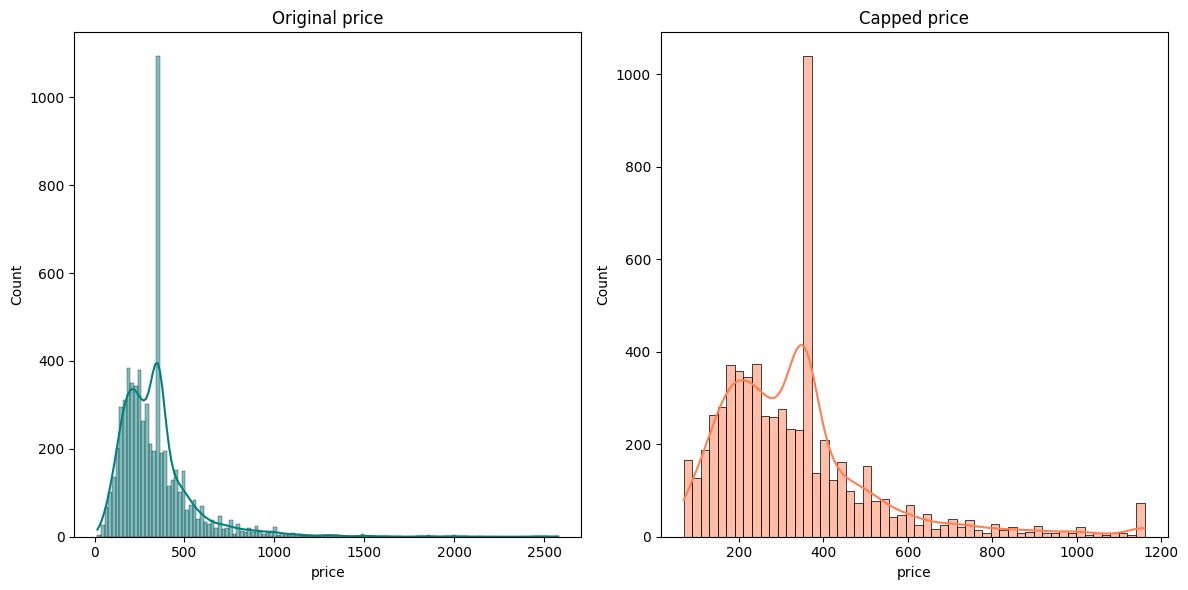

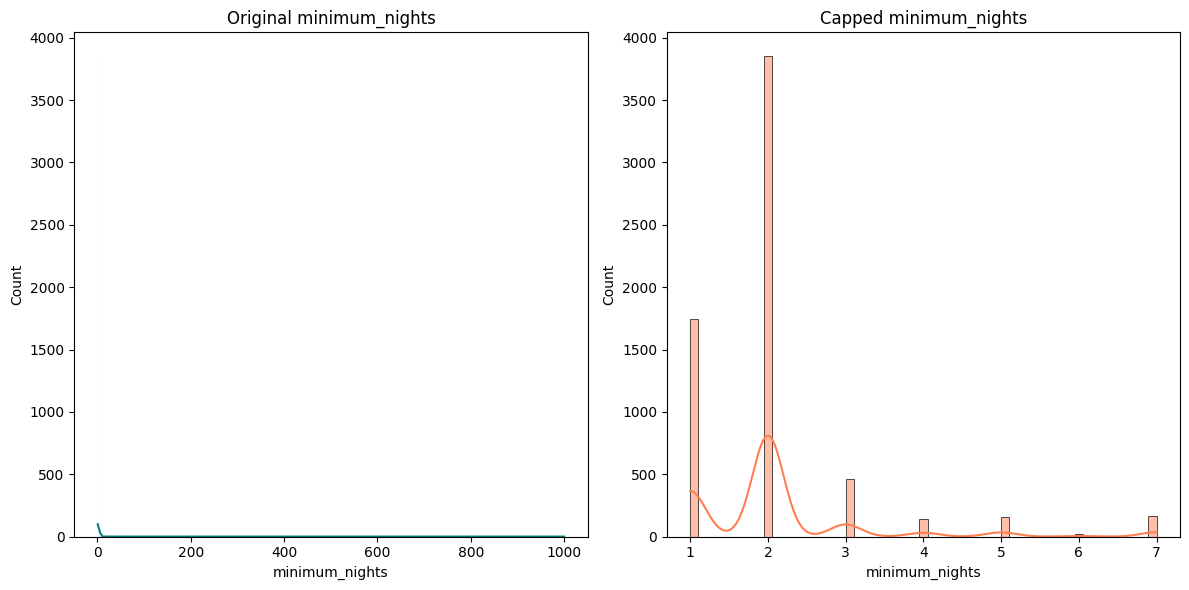

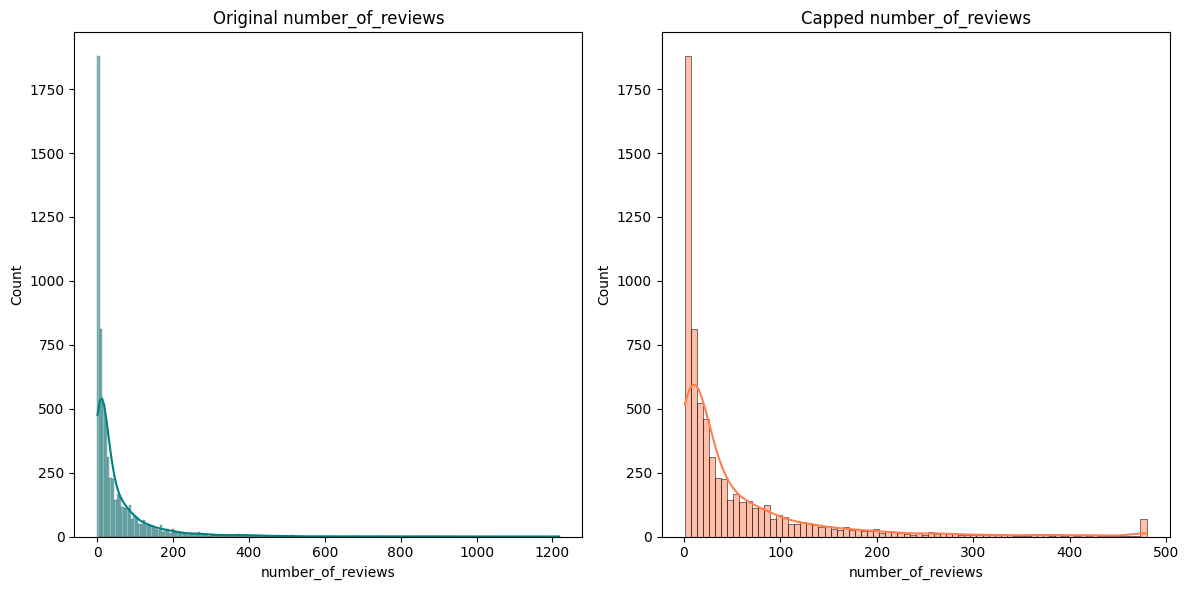

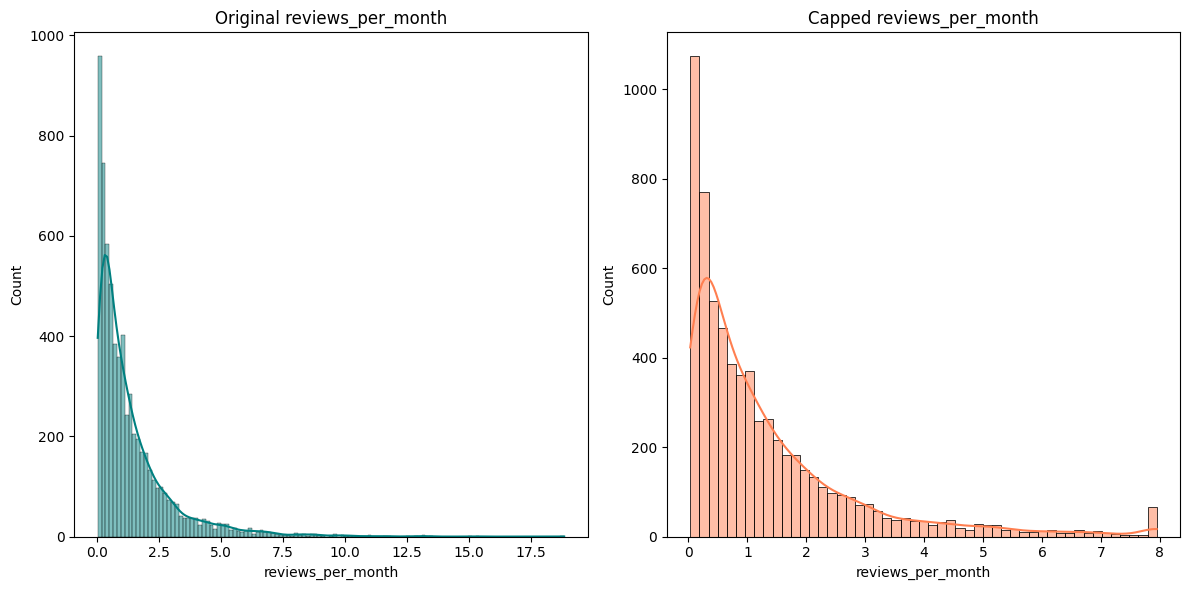

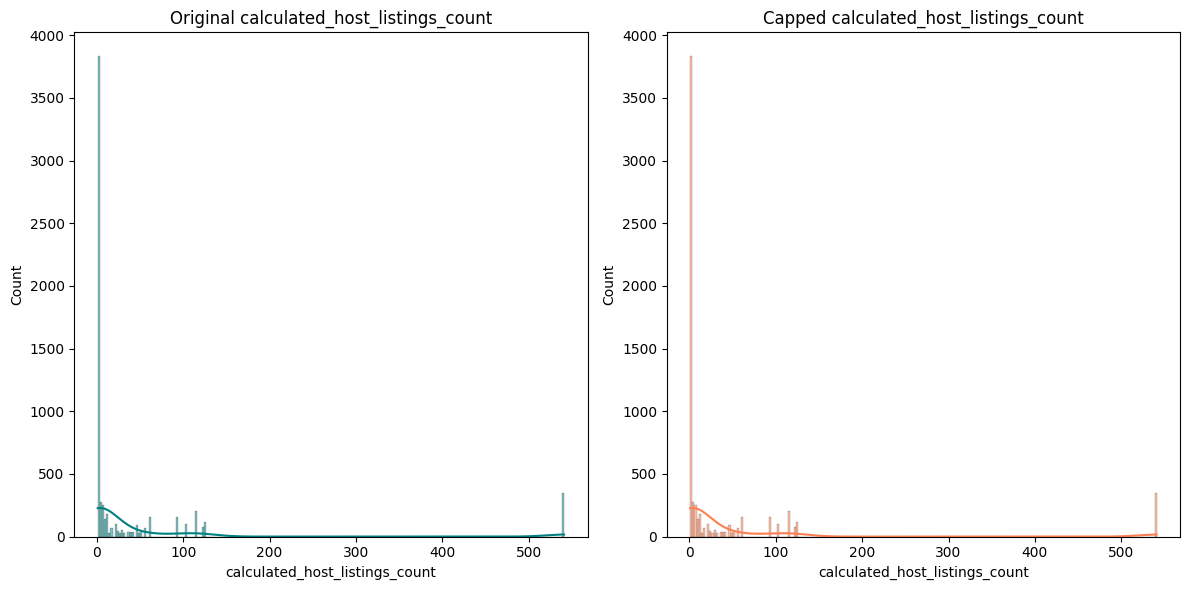

In [26]:
for column in columns_to_treat:
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], kde=True , color='Teal')
    plt.title(f"Original {column}")
    plt.subplot(1, 2, 2)
    sns.histplot(df_capped[column], kde=True , color='coral')
    plt.title(f"Capped {column}")
    plt.tight_layout()
    plt.show()

## Distribution Comparison

- **Original price distribution**: Skewed with many high-value outliers.
- **Capped price distribution**: More uniform, with a reduced range and fewer extreme values.

- **Original `minimum_nights` distribution**: Highly skewed with extreme values up to 1000 nights.
- **Capped `minimum_nights` distribution**: More balanced, with most values between 1 and 7 nights.

- **Original `number_of_reviews` distribution**: Highly skewed with values extending beyond 1000.
- **Capped `number_of_reviews` distribution**: Reduced range, fewer extreme values, more balanced distribution.

- **Original `reviews_per_month` distribution**: Skewed with a long tail extending beyond 15 reviews.
- **Capped `reviews_per_month` distribution**: More balanced distribution, with most values between 0 and 3 reviews.

- **Calculated Host Listings Count**
  - **Original**: Highly skewed with extreme values.
  - **Capped**: Slight reduction in extreme values; distribution remains similar.

## Correlation analysis

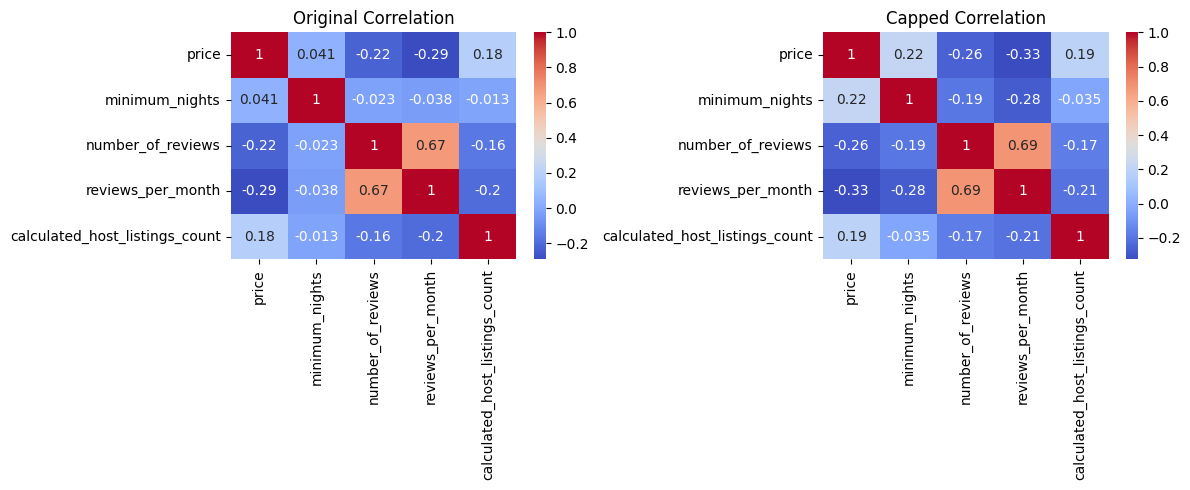

In [27]:
corr_original = df[columns_to_treat].corr()
corr_capped = df_capped[columns_to_treat].corr()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(corr_original, annot=True, cmap='coolwarm')
plt.title("Original Correlation")
plt.subplot(1, 2, 2)
sns.heatmap(corr_capped, annot=True, cmap='coolwarm')
plt.title("Capped Correlation")
plt.tight_layout()
plt.show()

## Summary Points

- The strongest positive correlation is between `number_of_reviews` and `reviews_per_month` in both matrices.
- `Price` shows negative correlations with `number_of_reviews` and `reviews_per_month`, with the capped data showing a stronger negative correlation.
- `minimum_nights` has weak correlations with other variables in both matrices.
- The correlation between `price` and `minimum_nights` is higher in the capped data compared to the original data.

## Feature Engineering

In [28]:
df_capped.loc[:, 'price_per_night'] = df_capped['price'] / df_capped['minimum_nights']
df_capped.loc[:, 'review_frequency'] = df_capped['number_of_reviews'] / df_capped['reviews_per_month']

C:\Users\elhas\AppData\Local\Temp\ipykernel_24756\3402457823.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_capped.loc[:, 'price_per_night'] = df_capped['price'] / df_capped['minimum_nights']
C:\Users\elhas\AppData\Local\Temp\ipykernel_24756\3402457823.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_capped.loc[:, 'review_frequency'] = df_capped['number_of_reviews'] / df_capped['reviews_per_month']


## Analyze high-priced listings:

In [29]:
# Analyze high-priced listings
high_price_listings = df_capped[(df_capped['price'] > 393) & (df_capped['price'] <= 1160)]

# Print summary statistics
print("\n===== High-Priced Listings Summary =====")
summary_stats = high_price_listings[columns_to_treat + ['price_per_night']].describe()

# Format and display the summary statistics
print(summary_stats.to_string(float_format="%.2f"))


===== High-Priced Listings Summary =====
        price  minimum_nights  number_of_reviews  reviews_per_month  calculated_host_listings_count  price_per_night
count 1566.00         1566.00            1566.00            1566.00                         1566.00          1566.00
mean   570.17            2.31              28.81               0.76                           84.38           298.18
std    171.95            1.28              49.12               0.93                          164.95           156.10
min    394.00            1.00               1.00               0.03                            1.00            57.14
25%    445.25            2.00               3.25               0.19                            1.00           205.62
50%    505.50            2.00              11.00               0.42                            5.50           250.00
75%    648.00            2.00              32.00               1.00                           93.00           367.75
max   1155.00         

## Examine popular listings:

In [30]:
# Analyze popular listings
popular_listings = df_capped[(df_capped['number_of_reviews'] > 65) & (df_capped['number_of_reviews'] <= 479)]

# Print summary statistics
print("\n===== Popular Listings Summary =====")
summary_stats = popular_listings[columns_to_treat + ['review_frequency']].describe()

# Format and display the summary statistics
print(summary_stats.to_string(float_format="%.2f"))


===== Popular Listings Summary =====
        price  minimum_nights  number_of_reviews  reviews_per_month  calculated_host_listings_count  review_frequency
count 1558.00         1558.00            1558.00            1558.00                         1558.00           1558.00
mean   259.15            1.75             153.03               2.57                            6.93             69.78
std    145.02            0.77              90.73               1.64                           21.20             29.94
min     70.00            1.00              66.00               0.50                            1.00              8.81
25%    164.25            1.00              86.00               1.36                            1.00             43.50
50%    222.00            2.00             121.50               2.10                            1.00             70.07
75%    338.75            2.00             187.00               3.27                            3.00             92.17
max   1160.10     

## Distribution of Host Listings Count

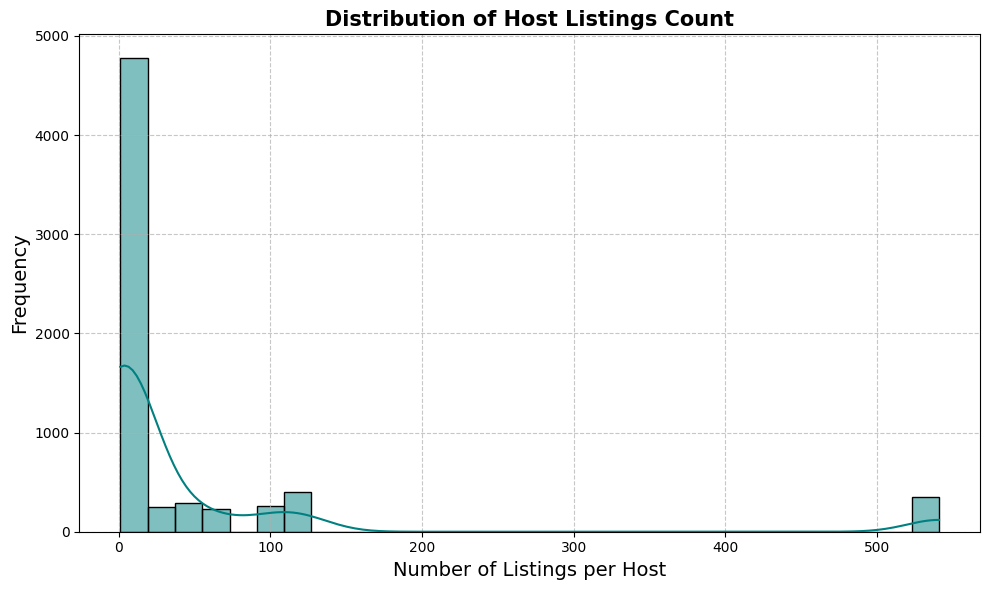

In [31]:
# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot the histogram with KDE
sns.histplot(df_capped['calculated_host_listings_count'], bins=30, kde=True, color='teal')

# Add title and labels
plt.title("Distribution of Host Listings Count", fontsize=15, fontweight='bold')
plt.xlabel("Number of Listings per Host", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Customize ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

## Summary

- Most hosts have a small number of listings (0-50), creating a sharp peak on the left side of the graph.
- The frequency decreases significantly as the number of listings per host increases.
- There is a slight increase in frequency around 500 listings, indicating a few hosts with a large number of properties.
- The distribution is heavily right-skewed, showing that while most hosts have few listings, a small number of hosts manage many listings.

## Host Type Distribution Based on Number of Listings

In [32]:
host_types = pd.cut(df_capped['calculated_host_listings_count'], 
                    bins=[0, 1, 5, 20, np.inf], 
                    labels=['Individual', 'Small Host', 'Medium Host', 'Large Host'])
host_type_counts = host_types.value_counts()
print("Host Type Distribution:")
print(host_type_counts)

Host Type Distribution:
calculated_host_listings_count
Individual     2962
Large Host     1773
Small Host     1148
Medium Host     667
Name: count, dtype: int64


In [33]:
# Create review categories
def categorize_reviews(num):
    if num <= 10:
        return '0-10'
    elif num <= 50:
        return '11-50'
    elif num <= 100:
        return '51-100'
    elif num <= 200:
        return '101-200'
    else:
        return '200+'

C:\Users\elhas\AppData\Local\Temp\ipykernel_24756\181424334.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_capped['review_category'] = df_capped['number_of_reviews'].apply(categorize_reviews)


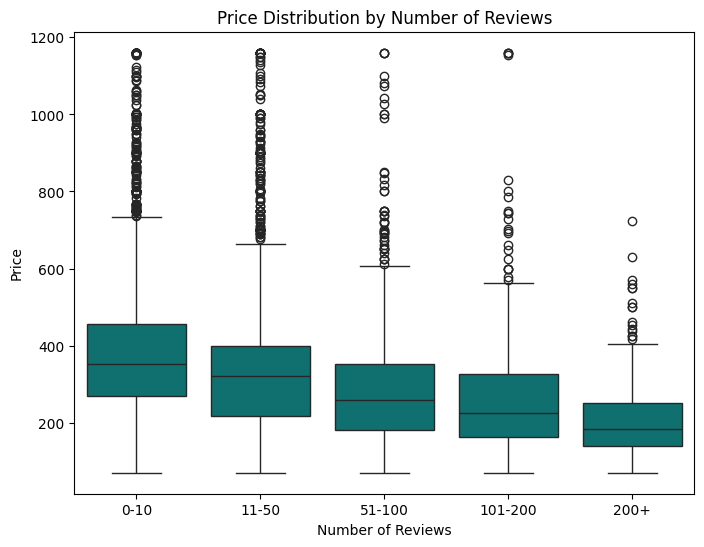

In [34]:
# Add a new column for review categories
df_capped['review_category'] = df_capped['number_of_reviews'].apply(categorize_reviews)



# Create the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='review_category', y='price', data=df_capped, order=['0-10', '11-50', '51-100', '101-200', '200+'],color='teal')
plt.title('Price Distribution by Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.xticks(rotation=0)
plt.show()

## Summary: Price Distribution by Number of Reviews

- Listings with fewer reviews (0-10) typically have higher median prices and greater price variability.
- As the number of reviews increases, the median price generally decreases.
- The price range narrows for listings with more reviews.
- There are numerous outliers, especially in the higher price ranges.

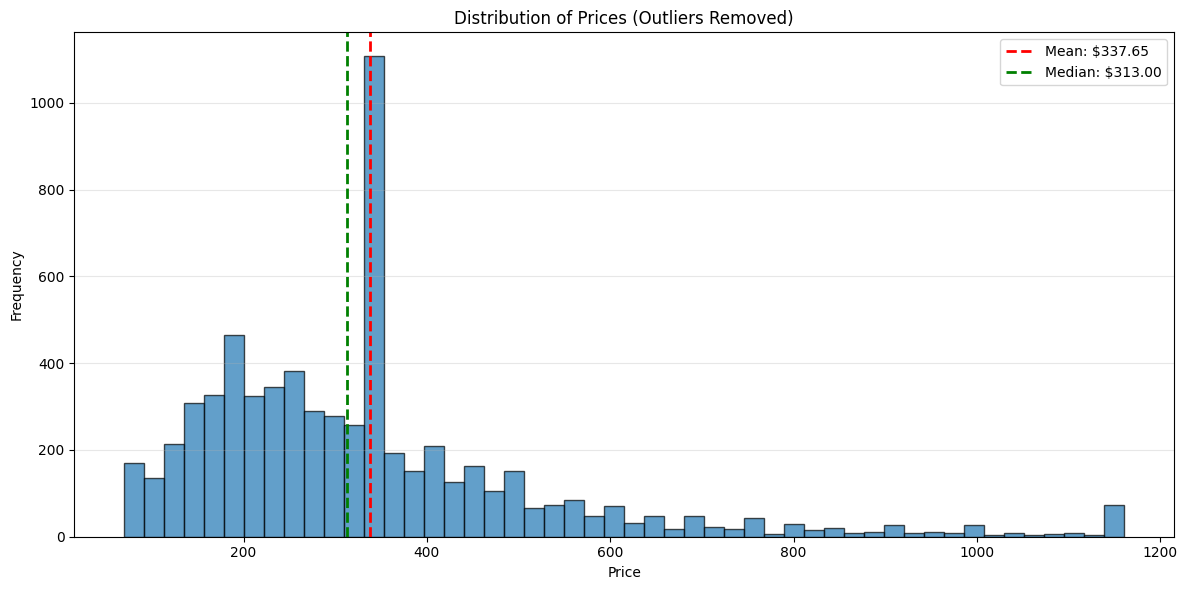

In [35]:
plt.figure(figsize=(12, 6))
plt.hist(df_capped['price'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribution of Prices (Outliers Removed)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.3)

# Add mean and median lines
mean_price = df_capped['price'].mean()
median_price = df_capped['price'].median()
plt.axvline(mean_price, color='red', linestyle='dashed', linewidth=2, label=f'Mean: ${mean_price:.2f}')
plt.axvline(median_price, color='green', linestyle='dashed', linewidth=2, label=f'Median: ${median_price:.2f}')

plt.legend()
plt.tight_layout()
plt.show()

## Summary: 

- The mean price is 337.65, and the median is 313.00.
- The distribution is right-skewed, with most listings concentrated in the lower price ranges.
- There is a peak in frequency around the 300-350 range.
- The frequency decreases as the price increases, with few listings priced above $800.

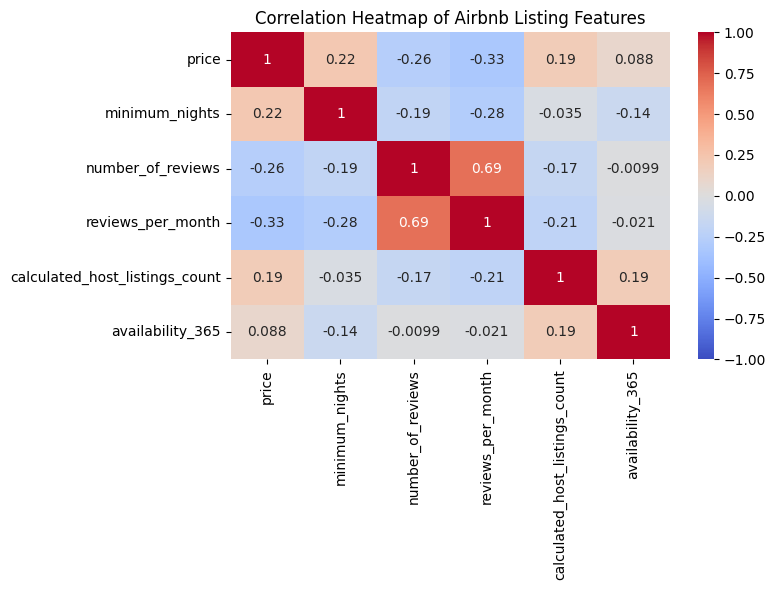

In [36]:
# Calculate correlation matrix
correlation_matrix = df_capped[['price', 'minimum_nights', 'number_of_reviews',
                         'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Airbnb Listing Features')
plt.tight_layout()
plt.show()

## Summary

- There is a strong positive correlation (0.69) between `number_of_reviews` and `reviews_per_month`.
- A moderate negative correlation (-0.33) exists between `price` and `reviews_per_month`.
- There is a weak positive correlation (0.22) between `price` and `minimum_nights`.

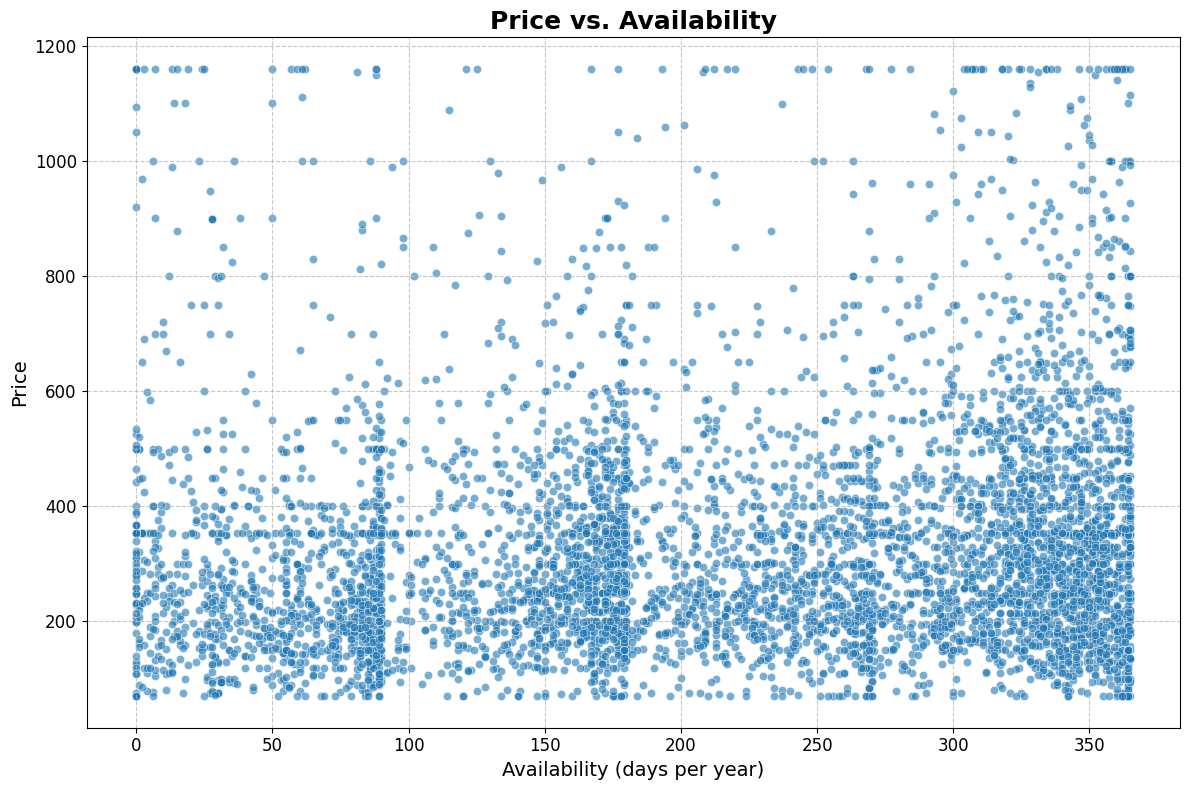

In [37]:
# Create a figure and axis
plt.figure(figsize=(12, 8))

# Plot the scatter plot
plt.scatter(df['availability_365'], df_capped['price'], alpha=0.6, edgecolors='w', linewidth=0.5)

# Add title and labels
plt.title('Price vs. Availability', fontsize=18, fontweight='bold')
plt.xlabel('Availability (days per year)', fontsize=14)
plt.ylabel('Price', fontsize=14)

# Customize ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

## Summary

- Prices vary widely across all availability levels.
- There is a higher concentration of listings in the lower price range (below 600).
- Some very high-priced listings (above 1000) are present across different availability levels.
- There is no clear linear relationship between price and availability.

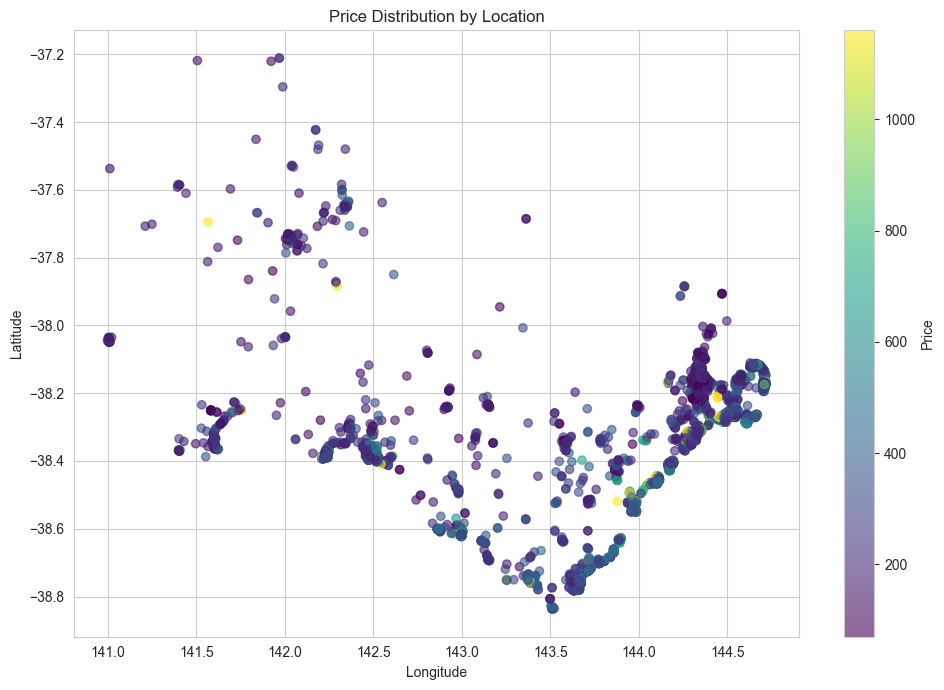

In [58]:
# Price by Location 
plt.figure(figsize=(10, 7))
scatter = plt.scatter(df['longitude'], df['latitude'], c=df_capped['price'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Price')
plt.title('Price Distribution by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()

## Summary 
- Listings are grouped in a few popular areas or neighborhoods.
- Prices vary widely across different locations.
- Some areas have more expensive listings, shown by lighter colored dots.

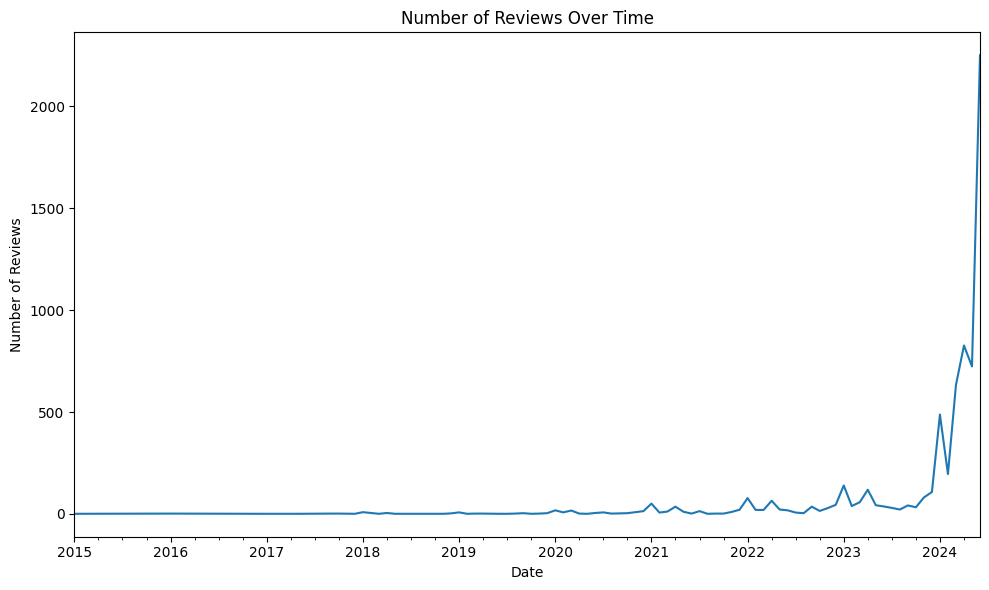

In [39]:
# Reviews Over Time :

# Convert 'last_review' to datetime 
df['last_review'] = pd.to_datetime(df['last_review'])

# Group by month and count reviews
monthly_reviews = df.groupby(df['last_review'].dt.to_period('M')).size()

plt.figure(figsize=(10, 6))
monthly_reviews.plot(kind='line')
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.tight_layout()
plt.show()

## Summary 

- The number of reviews was low and stable from 2015 to early 2023.
- There was a dramatic increase in reviews starting in late 2023, peaking at over 2000 reviews.
- Recent data shows a slight decrease in reviews after reaching the highest point.

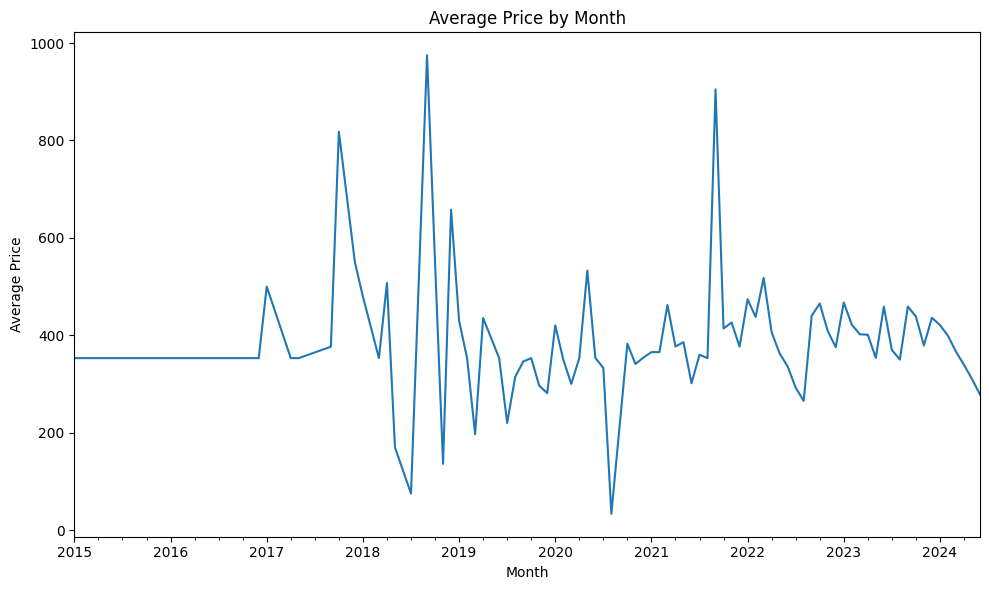

In [40]:
# Convert 'last_review' to datetime if it's not already
df['last_review'] = pd.to_datetime(df['last_review'])

# Extract month and create average price by month
monthly_avg_price = df.groupby(df['last_review'].dt.to_period('M'))['price'].mean()

plt.figure(figsize=(10, 6))
monthly_avg_price.plot(kind='line')
plt.title('Average Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Summary

- Prices were stable from 2015 to early 2017.
- Starting in 2017, prices began to fluctuate a lot.
- There were sharp spikes in prices, with the highest in 2018 and 2019.
- Overall, prices have become more unstable over time.

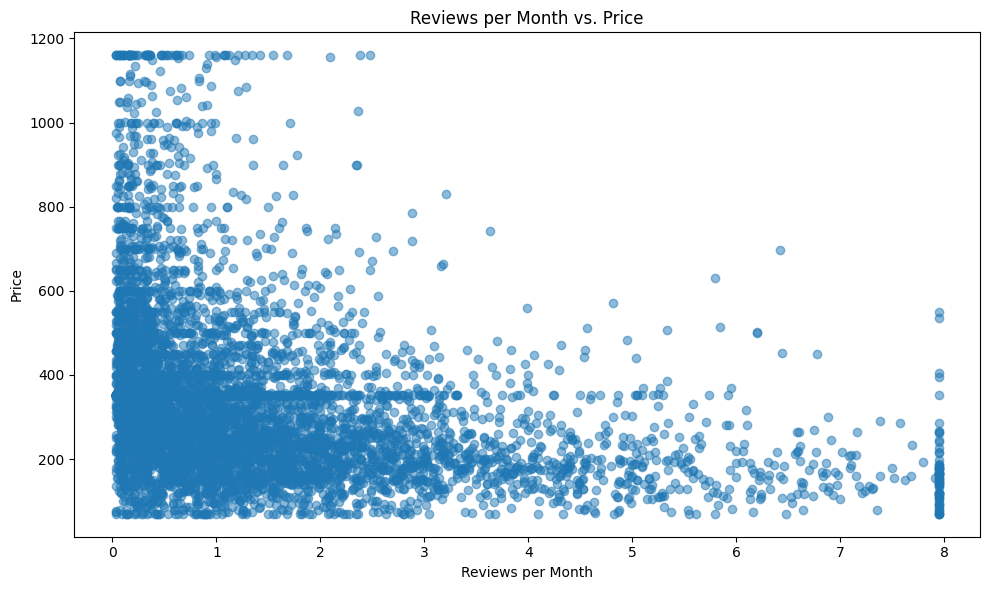

In [41]:
plt.figure(figsize=(10, 6))
plt.scatter(df_capped['reviews_per_month'], df_capped['price'], alpha=0.5)
plt.title('Reviews per Month vs. Price')
plt.xlabel('Reviews per Month')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

## Summary: 

- Most listings have low reviews per month (0-2) across all price ranges.
- Prices generally decrease as reviews per month increase.
- The most expensive listings usually have fewer reviews per month.
- Prices vary widely for listings with low review frequencies.

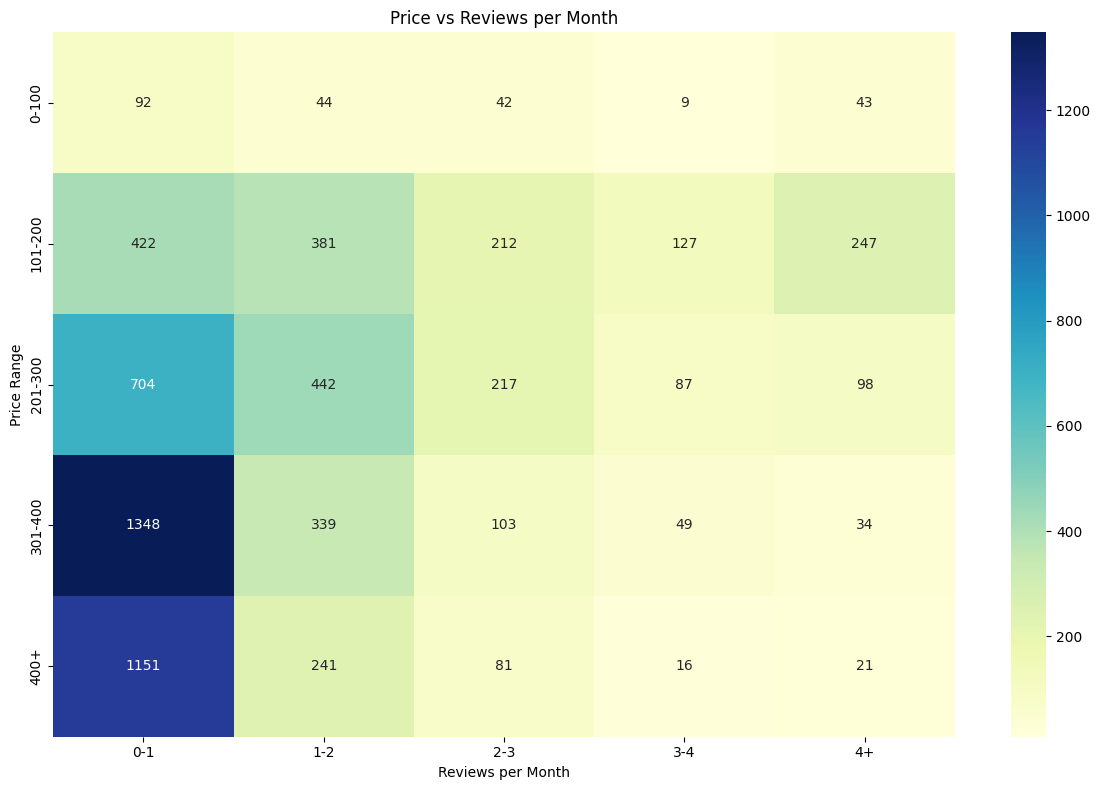

In [42]:
# Create price categories
df['price_category'] = pd.cut(df['price'], bins=[0, 100, 200, 300, 400, np.inf],
                              labels=['0-100', '101-200', '201-300', '301-400', '400+'])

# Create reviews_per_month categories
df['reviews_per_month_category'] = pd.cut(df['reviews_per_month'], bins=[0, 1, 2, 3, 4, np.inf], 
                                          labels=['0-1', '1-2', '2-3', '3-4', '4+'])

# Create the cross-tabulation
cross_tab = pd.crosstab(df['price_category'], df['reviews_per_month_category'])


# Visualize the cross-tabulation
plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Price vs Reviews per Month')
plt.xlabel('Reviews per Month')
plt.ylabel('Price Range')
plt.tight_layout()
plt.show()

## Summary

- Most listings (1348) are priced between 301-400 with 0-1 reviews per month.
- Listings with more reviews per month are fewer in all price ranges.
- Expensive listings (over 400) usually have fewer reviews per month.

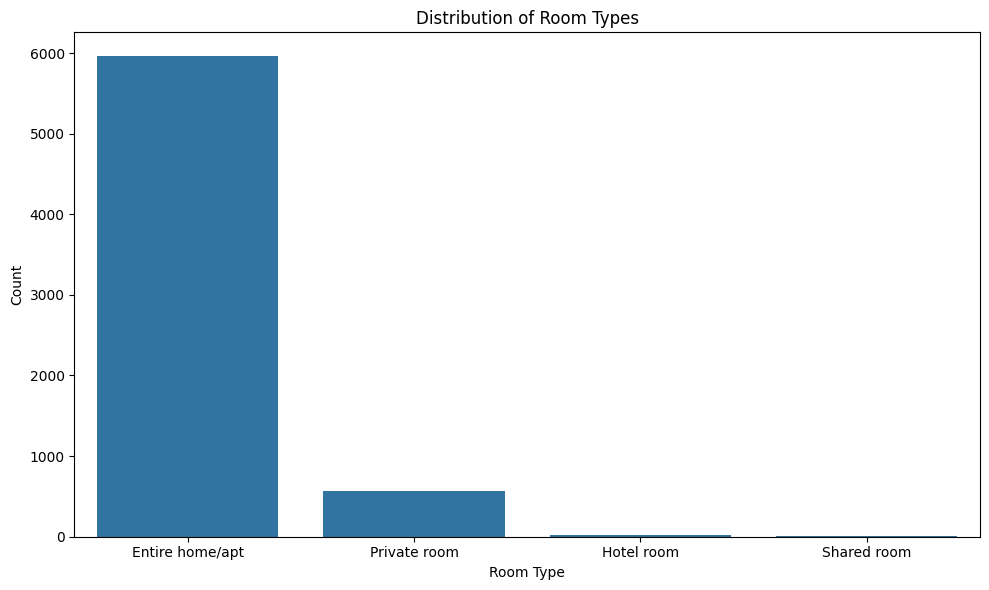

In [43]:
plt.figure(figsize=(10, 6))
sns.countplot(x='room_type', data=df_capped, order=df_capped['room_type'].value_counts().index)
plt.title('Distribution of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Summary:

- Entire homes/apartments are the most common, with around 6000 listings.
- Private rooms are the second most common, with about 600 listings.
- Hotel rooms and shared rooms are much less common, with very few listings.

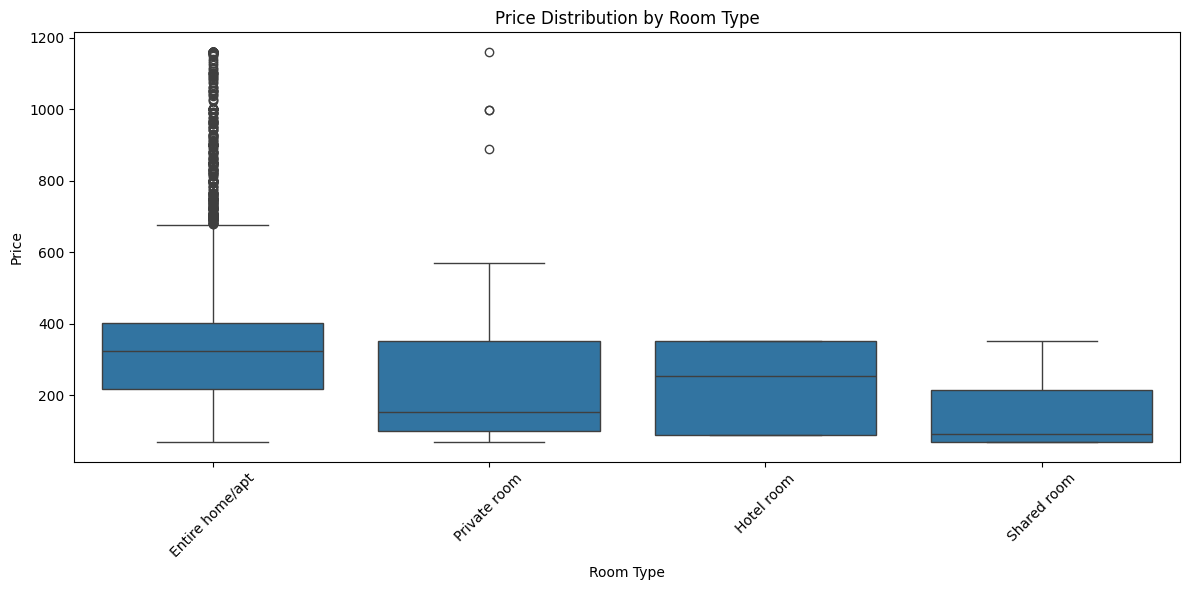

In [44]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='room_type', y='price', data=df_capped)
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Summary

- Entire homes/apartments have the highest median price and the widest range of prices.
- Private rooms have lower median prices compared to entire homes/apartments.
- Hotel rooms have a similar price range to private rooms but a slightly higher median price.
- Shared rooms have the lowest median price and the narrowest price range.
- There are many outliers, especially for entire homes/apartments, with some priced above $1000.

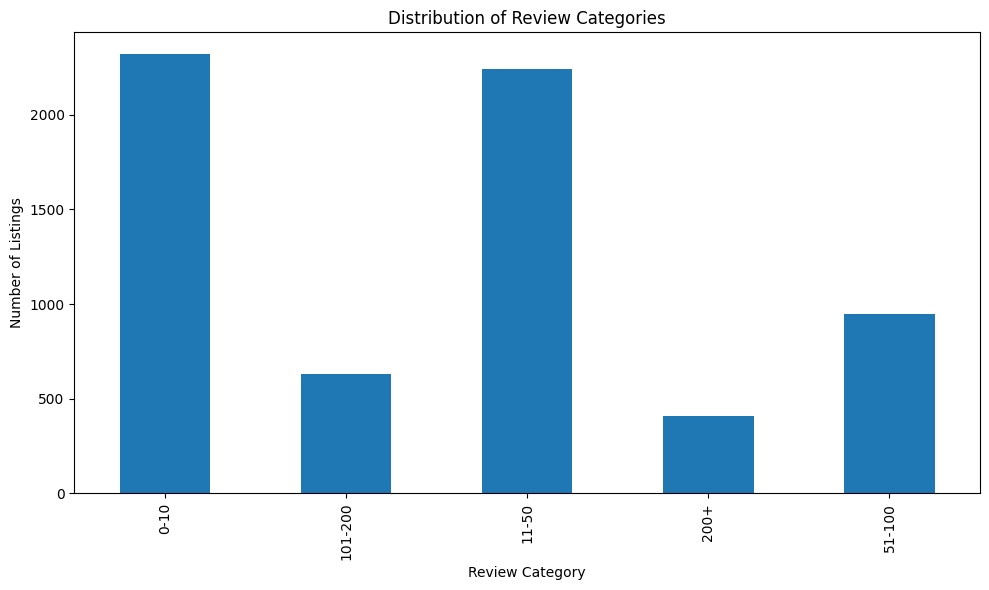

In [46]:
plt.figure(figsize=(10, 6))
df_capped['review_category'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Review Categories')
plt.xlabel('Review Category')
plt.ylabel('Number of Listings')
plt.tight_layout()
plt.show()

## Summary

- The most common category is 0-10 reviews, with about 2300 listings.
- The 11-50 reviews category is second, with slightly fewer listings.
- The 51-100 reviews category has around 1000 listings.
- The 101-200 and 200+ reviews categories have fewer listings, with 200+ being the least common.

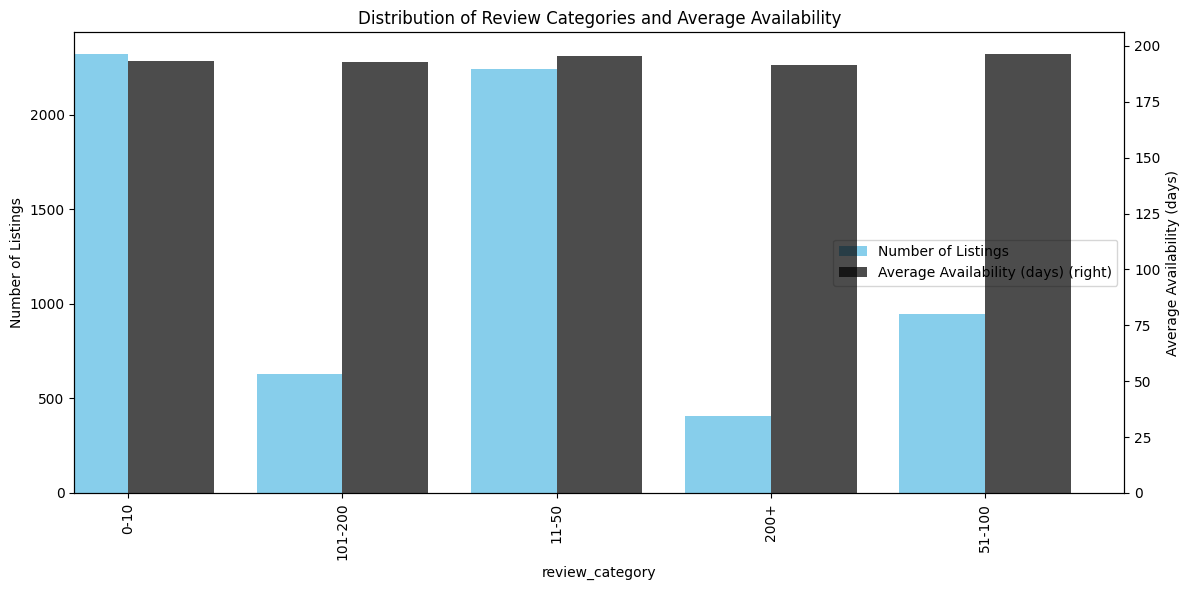

In [47]:
plt.figure(figsize=(12, 6))

# Group by review_category and calculate mean availability_365
availability_by_category = df_capped.groupby('review_category')['availability_365'].mean().sort_index()

# Get the count of listings in each review category
category_counts = df_capped['review_category'].value_counts().sort_index()

# Create the stacked bar chart
ax = category_counts.plot(kind='bar', position=1, width=0.4, color='skyblue', label='Number of Listings')
availability_by_category.plot(kind='bar', position=0, width=0.4, color='black', secondary_y=True, alpha=0.7, label='Average Availability (days)')

plt.title('Distribution of Review Categories and Average Availability')
plt.xlabel('Review Category')
ax.set_ylabel('Number of Listings')
ax.right_ax.set_ylabel('Average Availability (days)')

# Add legend
lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax.right_ax.get_legend_handles_labels()
ax.legend(lines1 + lines2, labels1 + labels2, loc='center right')

plt.tight_layout()
plt.show()

## Summary

- The 0-10 reviews category has the most listings, followed by the 11-50 reviews category.
- Average availability is fairly steady across all review categories, between 175 and 200 days.

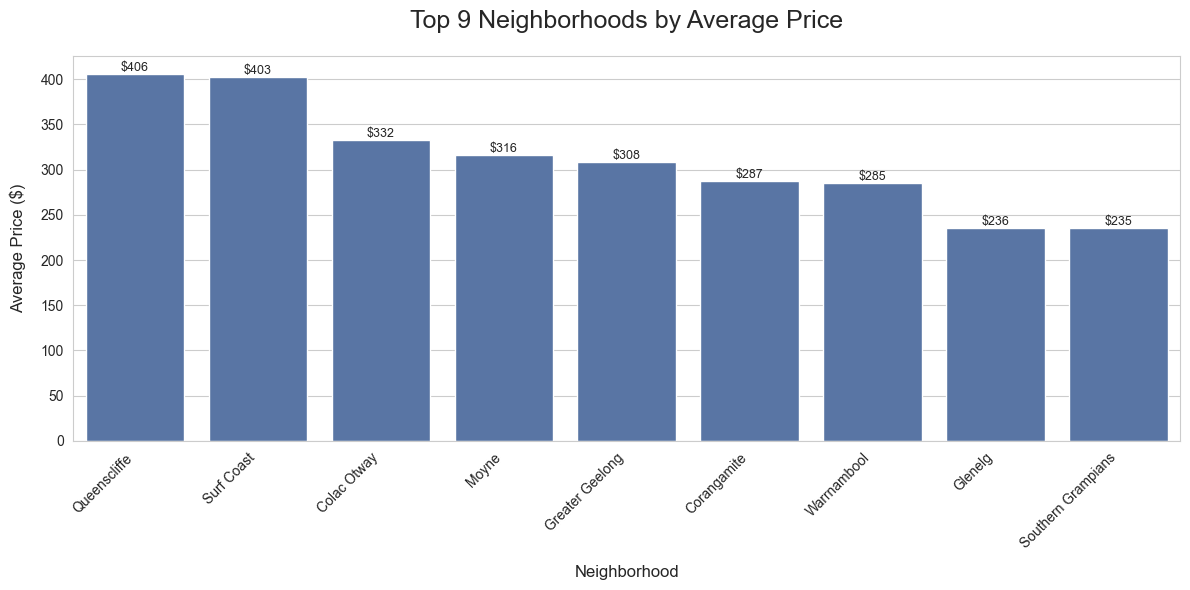

In [48]:
# Calculate top 9 neighborhoods
top_neighborhoods = df_capped.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).head(9)

# Set up the plot style
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.set_palette("deep")

# Create the bar plot
ax = sns.barplot(x=top_neighborhoods.index, y=top_neighborhoods.values)

# Customize the plot
plt.title('Top 9 Neighborhoods by Average Price', fontsize=18, pad=20)
plt.xlabel('Neighborhood', fontsize=12, labelpad=10)
plt.ylabel('Average Price ($)', fontsize=12, labelpad=10)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Add value labels on top of each bar
for i, v in enumerate(top_neighborhoods.values):
    ax.text(i, v, f'${v:,.0f}', ha='center', va='bottom', fontsize=9)

# Adjust layout and display
plt.tight_layout()
plt.show()

## Summary

- Queenscliffe has the highest average price at 406.
- Surf Coast is next at 403.
- Colac-Otway is third at 332.
- Southern Grampians has the lowest average price at 235.


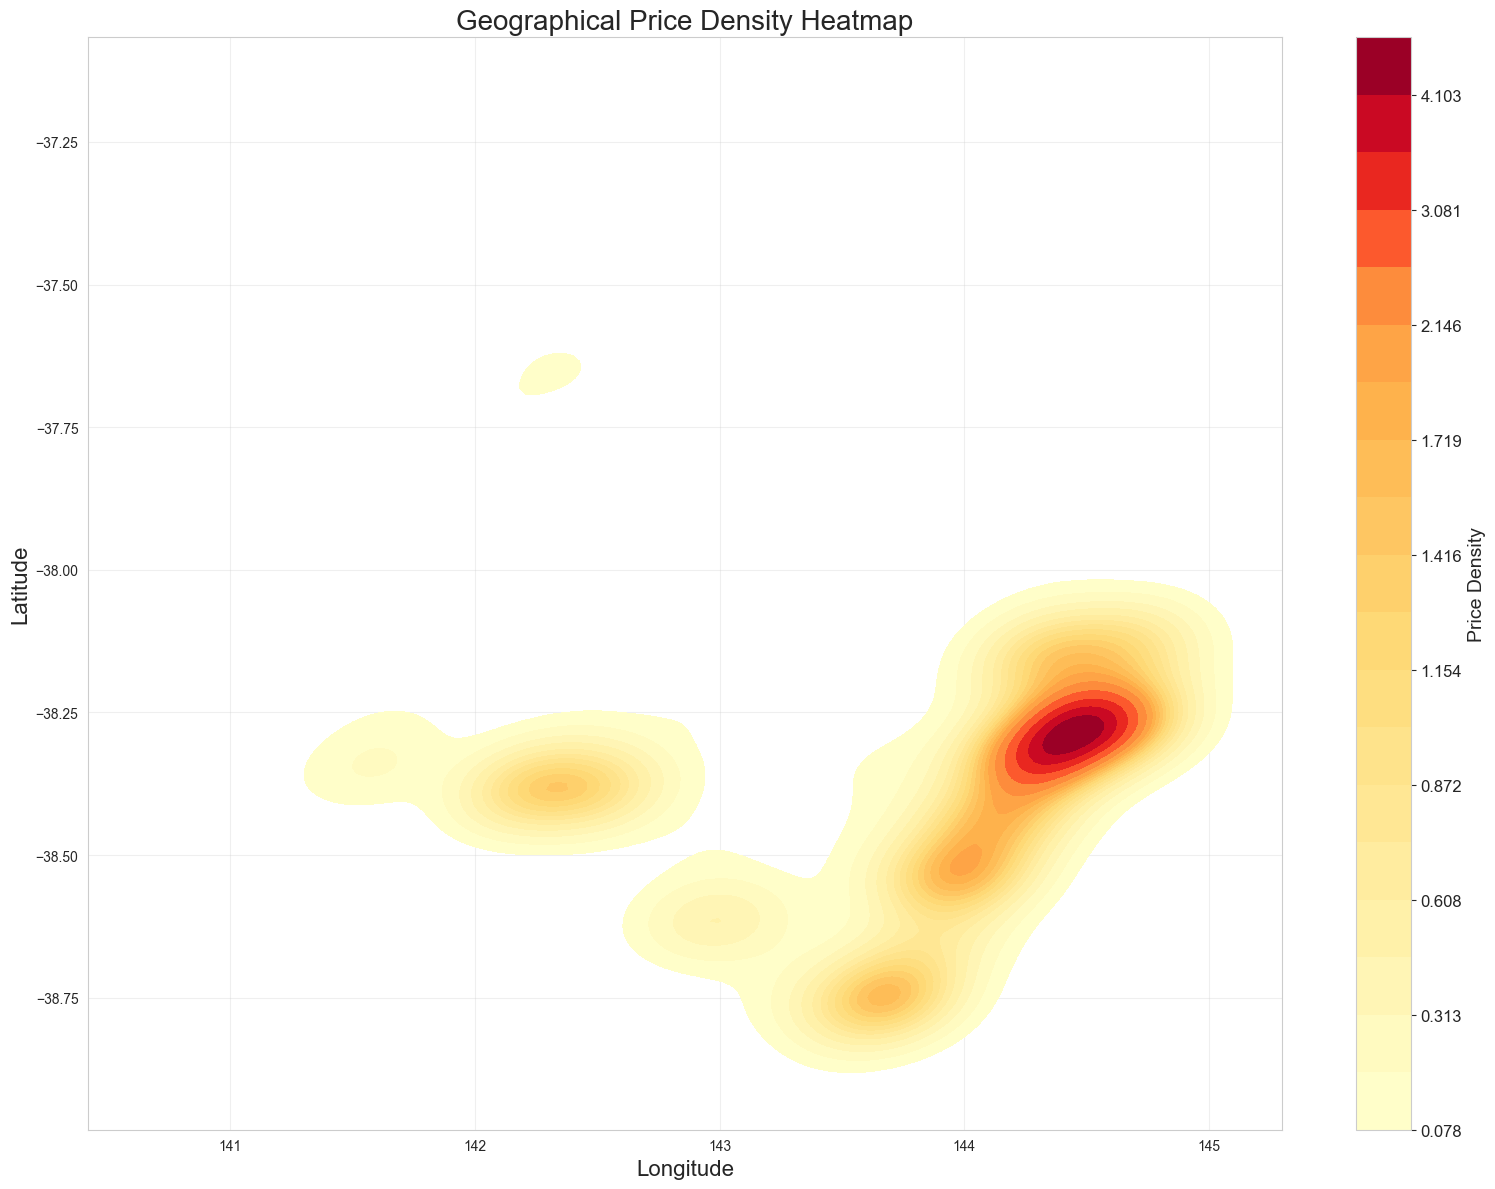

In [49]:
plt.figure(figsize=(16, 12))

# Capture the return value of kdeplot
kde_plot = sns.kdeplot(
    data=df_capped, 
    x='longitude', 
    y='latitude', 
    weights='price', 
    cmap='YlOrRd', 
    fill=True,
    levels=20,
    thresh=0.05
)

plt.title('Geographical Price Density Heatmap', fontsize=20)
plt.xlabel('Longitude', fontsize=16)
plt.ylabel('Latitude', fontsize=16)

# Use the captured plot to create the colorbar
cbar = plt.colorbar(kde_plot.collections[0], label='Price Density')
cbar.ax.tick_params(labelsize=12)
cbar.set_label('Price Density', fontsize=14)

# Add grid for better geographical reference
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Summary

- The highest prices (dark red) are found in a small area around longitude 144 and latitude -38.25.
- Other areas have moderate prices (orange to light red).
- The map covers latitudes from about -37.25 to -38.75 and longitudes from 141 to 145.
- This shows that some locations have much higher prices than nearby areas.

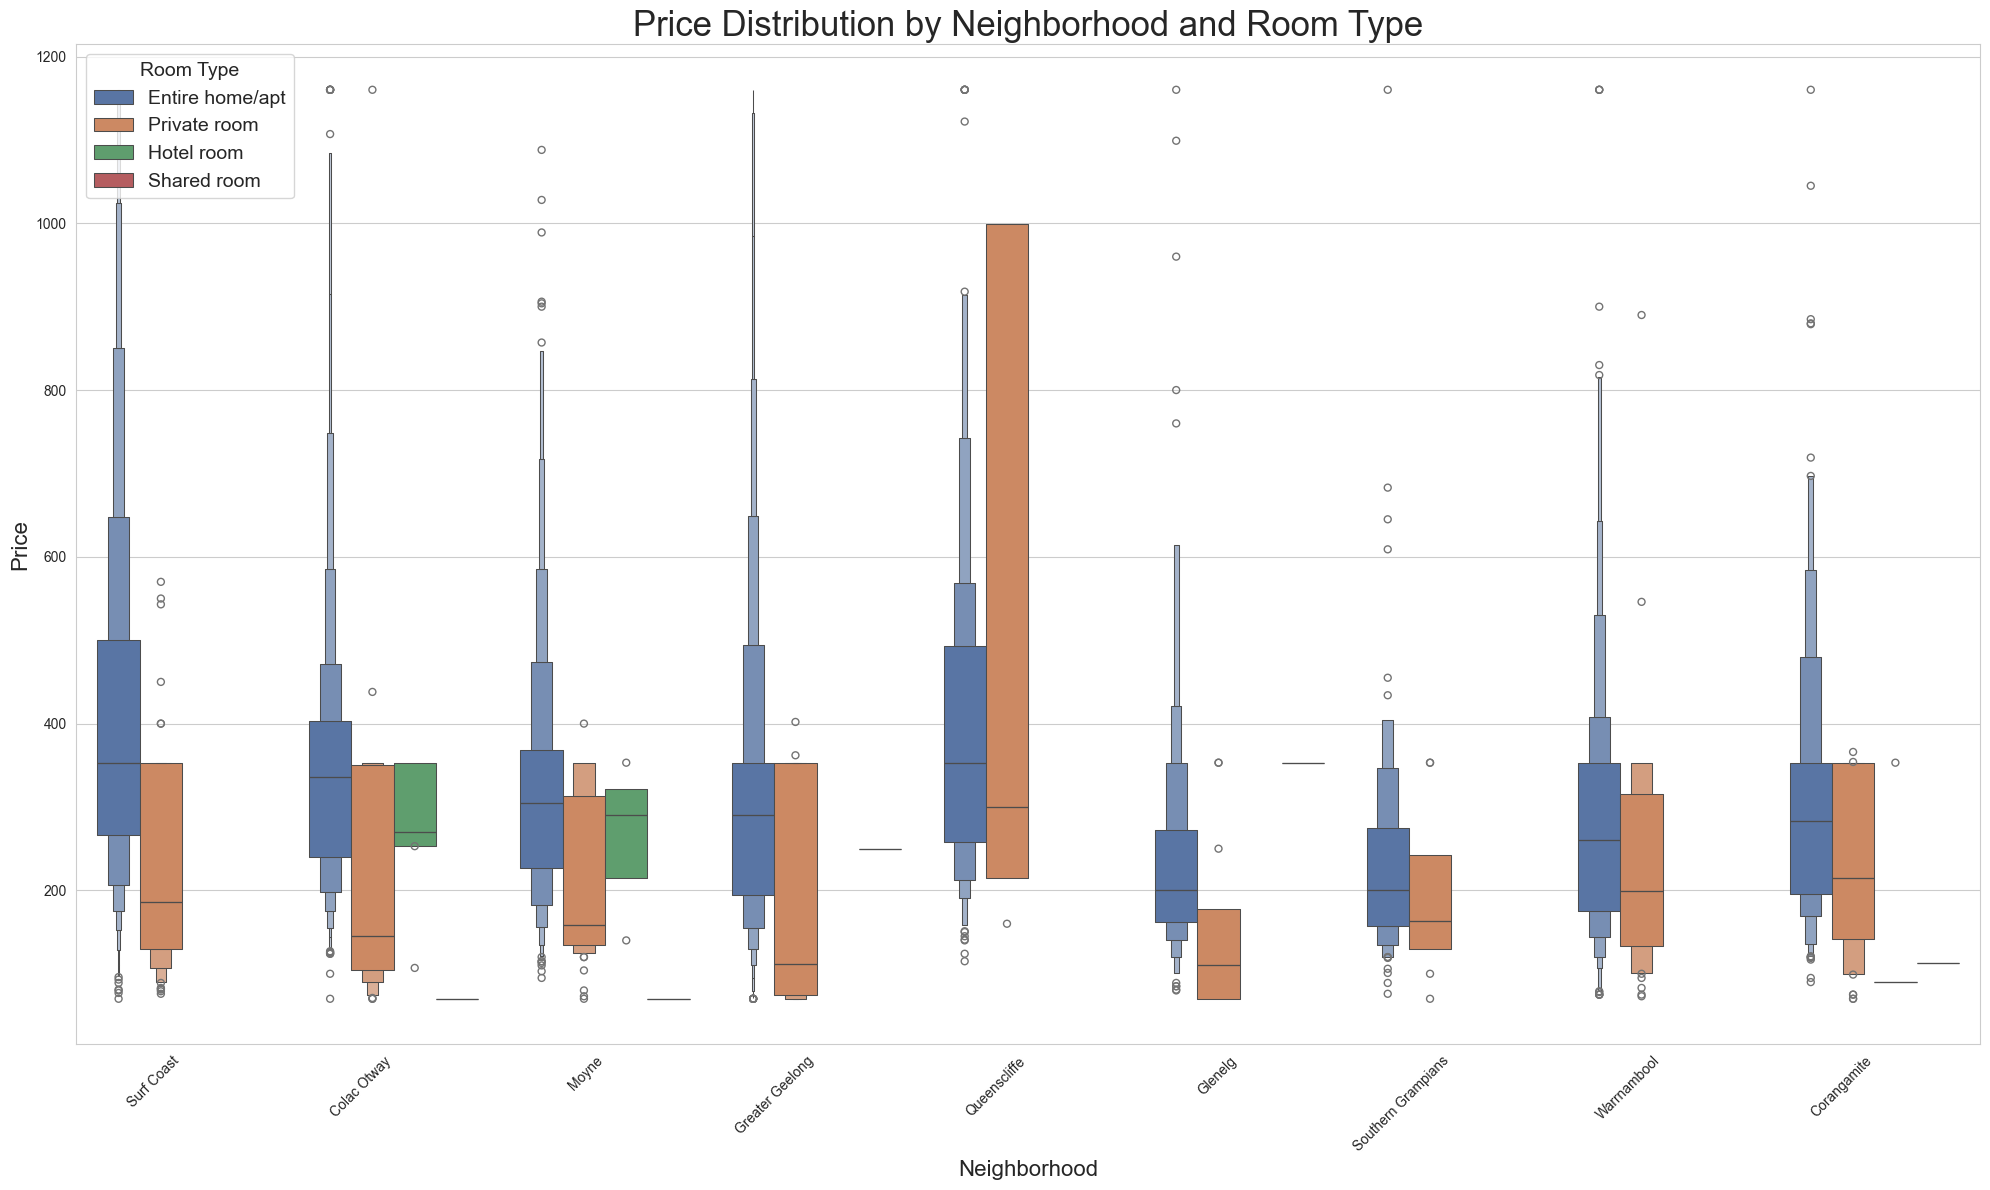

In [50]:
plt.figure(figsize=(20, 12))
sns.boxenplot(x='neighbourhood', y='price', hue='room_type', data=df_capped)
plt.title('Price Distribution by Neighborhood and Room Type', fontsize=25)
plt.xlabel('Neighborhood', fontsize=16)
plt.ylabel('Price', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Room Type', title_fontsize='14', fontsize='14')
plt.tight_layout()
plt.show()

## Summary

- Entire homes/apartments usually have the highest prices and widest range.
- Queenscliffe has the highest prices for both entire homes/apartments and private rooms.
- Private rooms generally cost less than entire homes/apartments.
- Hotel rooms and shared rooms are less common and have fewer data points.
- There are many high-priced listings for entire homes/apartments, with some over $1000.


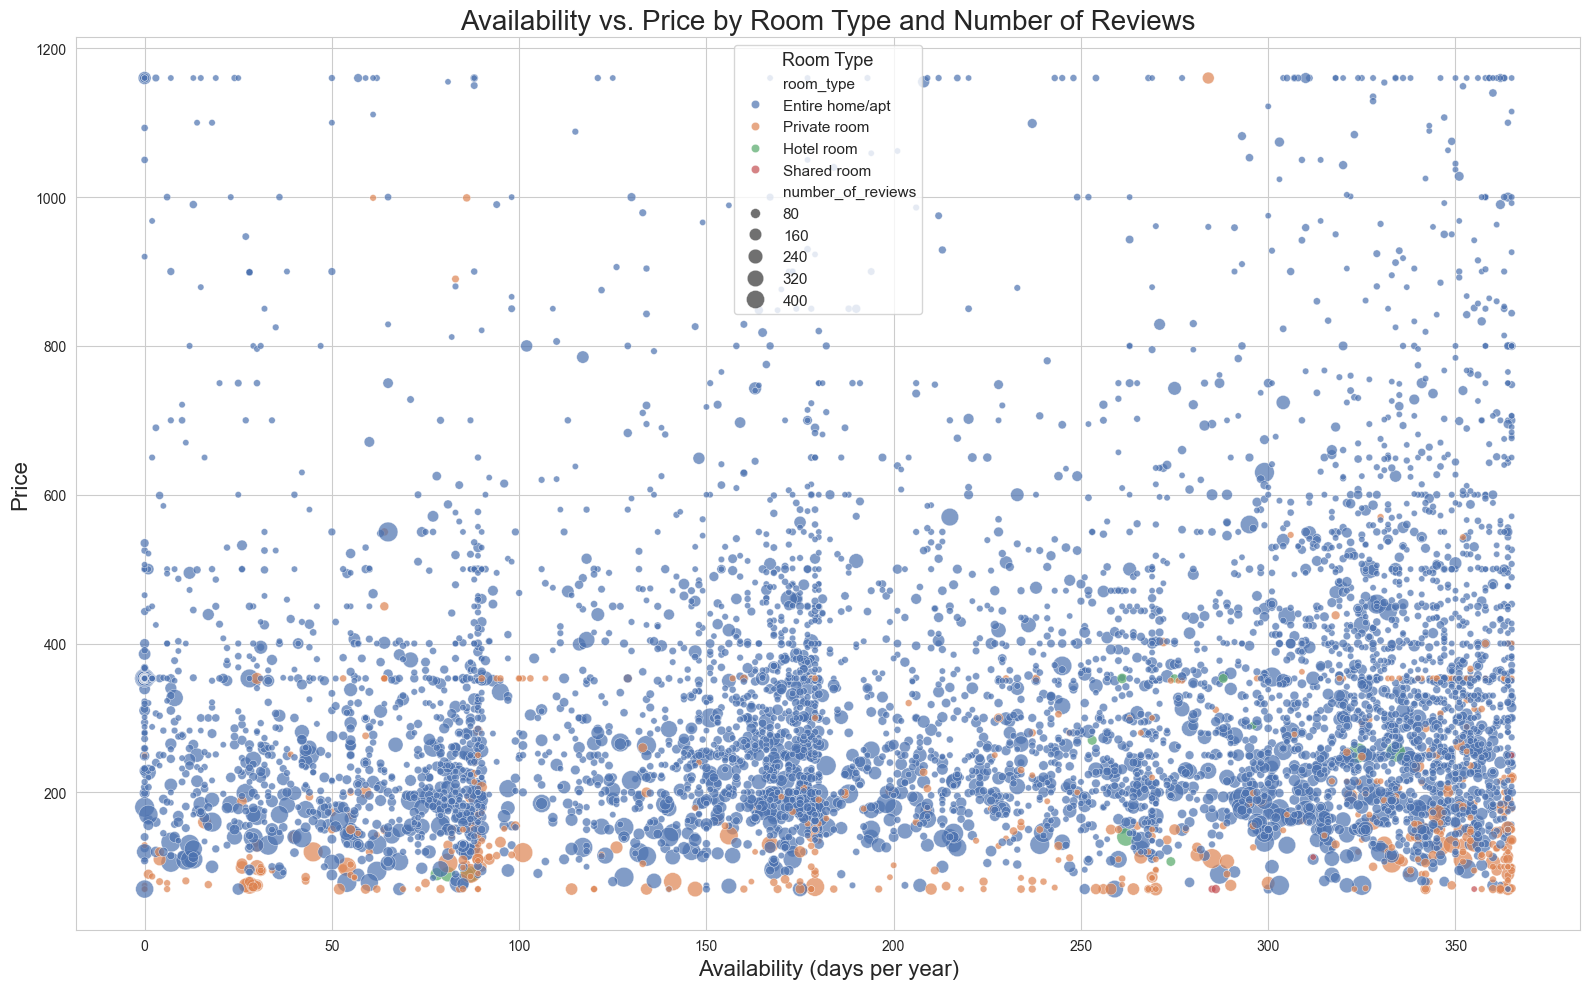

In [51]:
plt.figure(figsize=(16, 10))
sns.scatterplot(x='availability_365', y='price', hue='room_type', size='number_of_reviews', 
                sizes=(20, 200), alpha=0.7, palette='deep', data=df_capped)
plt.title('Availability vs. Price by Room Type and Number of Reviews', fontsize=20)
plt.xlabel('Availability (days per year)', fontsize=16)
plt.ylabel('Price', fontsize=16)
plt.legend(title='Room Type', title_fontsize='13', fontsize='11')
plt.tight_layout()
plt.show()

## Summary

- Entire home/apartment listings (blue dots) cover a wide range of prices and availability.
- Private rooms (orange dots) are usually at lower price points.
- Hotel and shared rooms are less common.
- Listings with more reviews (larger dots) are often in the middle range for both price and availability.
- Prices vary widely across all availability levels, with some very high-priced listings.

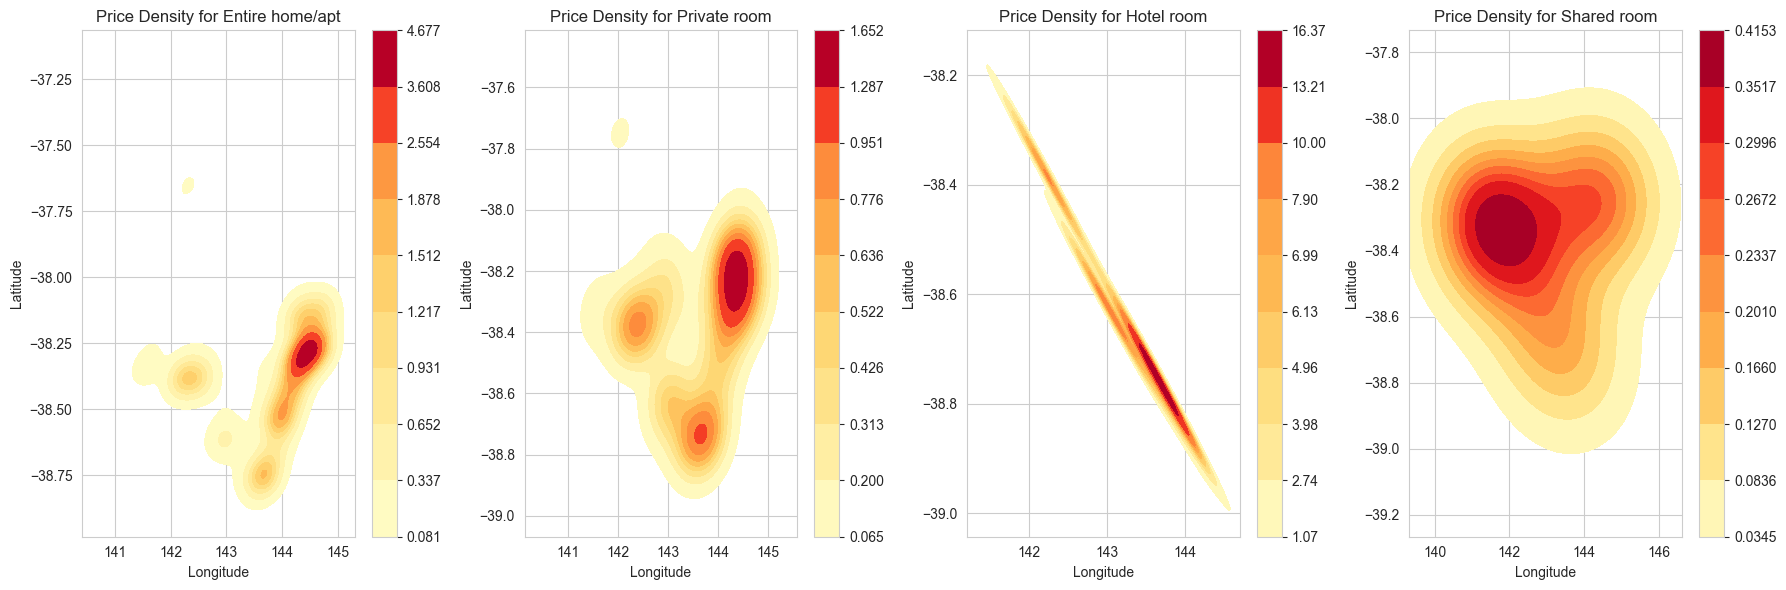

In [54]:
fig, axes = plt.subplots(1, 4, figsize=(18, 6))
room_types = df['room_type'].unique()

for i, room_type in enumerate(room_types):
    subset = df[df['room_type'] == room_type]
    sns.kdeplot(data=subset, x='longitude', y='latitude', 
                weights='price', cmap='YlOrRd', 
                fill=True, cbar=True, ax=axes[i])
    axes[i].set_title(f'Price Density for {room_type}')
    axes[i].set_xlabel('Longitude')
    axes[i].set_ylabel('Latitude')

plt.tight_layout()
plt.show()

## Summary

- Entire home/apartment listings have the highest price density around longitude 144 and latitude -38.25.
- Private rooms have a similar pattern but with lower prices.
- Hotel rooms show a linear pattern, indicating they might be concentrated along a specific route or area.
- Shared rooms have the lowest price density and are found in a small area.
